In [ ]:
#install if not already
#!pip install beautifulsoup4

In [106]:
# import the library
%matplotlib inline

from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup
import urllib
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Functions

####  getLikes(url) -> Takes url. Loads page and extracts likes. Returns number of likes

In [52]:
def getLikes(url):
    # Takes url. Loads page and extracts likes. Returns number of likes
    try:
        #load website & parse with bs4
#         print('Loading : ', url)
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page,'html.parser')
    except URLError as e:
        print(e)
        
    # get likes with unclicked tag
    try:
        likes = soup.find_all('button',class_='like-button-renderer-like-button-unclicked')
#         print('# likes found : ', likes[0].text)
        numLikes = likes[0].text.replace(',', '') #remove thosand-comma Ex.1,300
        return pd.to_numeric(numLikes)
    except HTTPError as e:
        print(e)
        return '0'

#### keepTally(df) - -> Create new column and getLikes and Save to CSV

In [30]:
def keepTally(df):
    # Takes a df (teamName, url). Returns df + new column (name = timeRun) with scrapped likes
    
    fieldName = dt.datetime.now().strftime("%y-%m-%d.%H:%M")
    print("New field: ", fieldName)
    
    # apply getLikes to df
    df[fieldName] = df['url'].apply( lambda x : getLikes(x))
    print("Getting likes: complete")
    
    # sort by # votes from last scrape and save to csv
    df = df.sort_values(by= fieldName, ascending=False)
    df.to_csv("videoLikesTracker.csv", header=True, index=False)
    print("Save to csve fie 'videoLikesTracker.csv'")
    
    return "Tracker updated!"

##  Create teams df and first run (ONLY THE 1st TIME)

####  Load teams info a df

In [27]:
tracker = pd.read_csv("teamsInfo.csv")
len(tracker)

69

# Regular runs start HERE

##  Load from csv to a df and keepTally(df)
- tracker ("videoLikesTracker.csv") will get a new column added with the latest likes count
- *NOTE skick this step on the 1st Run (data loaded from teamsInfo.csv)

In [91]:
tracker = pd.read_csv("videoLikesTracker.csv")

## Go get me the likes for all teams!

In [92]:
keepTally(tracker)
tracker.head()

New field:  18-05-16.12:05
Getting likes: complete
Save to csve fie 'videoLikesTracker.csv'


team                                          url  18-05-16.10:05  \
0  YouRoot.io  https://www.youtube.com/watch?v=AmyVmUzp5WQ         16172.0   
1  Loan-Block  https://www.youtube.com/watch?v=Zxhj9Z-PnOw         13267.0   
2   Langchain  https://www.youtube.com/watch?v=3kJvpq8pcsY         12748.0   
3      Smartz  https://www.youtube.com/watch?v=7FaHxxnmiZs         13224.0   
4      Armada  https://www.youtube.com/watch?v=enTh04mX5FQ         12610.0   

   18-05-16.11:03  18-05-16.11:31  18-05-16.12:05  
0         16664.0         17569.0         17765.0  
1         14762.0         15480.0         16265.0  
2         14134.0         14314.0         15219.0  
3         14086.0         14174.0         14182.0  
4         13597.0         13748.0         15167.0

# Results

####  Top 15 teams

In [141]:
lastVote = 'likes'
tracker.columns = ['team','url', '1:30', '0:49', '0:29', lastVote]
tracker[['team', lastVote]]

team  likes
0                                   YouRoot.io  17765
1                                   Loan-Block  16265
2                                    Langchain  15219
3                                       Smartz  14182
4                                       Armada  15167
5                                Serial Coders  13825
6                                     Nooberly  14636
7                                     DAO Axis  13689
8                             CollectiveHealth  12689
9                            Team Decentralize  12692
10                               Cryptonominee  10851
11                             The AGE Project  10453
12                                       Undra  10880
13                                    CADChain   8821
14                                   DinoSpace   5251
15                                    GGRocket   4411
16                                   LoRaChain   4140
17                                     HedgeAI   4036
18                                         VIM   3577
19                                   LetItPlay   3189
20                                        Tala   3056
21                                Happy Donkey   2651
22                                     Hclaims   2329
23                              Blockchain Lab   2320
24                                   IT Sphere   1952
25  DelegationOne - High performing EOS Wallet   1917
26                                  Bee Social   1794
27                            ClickBait Studio   2121
28                             This Coin Rocks   1585
29                                       Drops   1545
30                              Babel Masonary   1381
31                               EOS FinCrowds   1085
32                                 Way Network   1068
33                               Turing School    676
34                                       Codum    429
35                                  iRespo.com    365
36                                  FairAccess    264
37                                   Delegator    251
38                                       Magni    229
39                                       Query    112
40                                    EduBlock     94
41                                Binary Focus     90
42                                      Uotton     80
43                                 GFG Machine     65
44                              AGI Laboratory     58
45                                       Ownit     49
46                                     DUCATUR     46
47                                   Moby Dapp     37
48                                     DevPool     34
49                           EOS for Democracy     26
50                           Screen Time Token     21
51                             Consensus Clubs     14
52                                  Axe Julius     10
53                                   EOSomnia🌙     10
54                                  Block.Vote      7
55                              Worldwide Taxi      5
56                                       CoArt      4
57                                     EOSREAL      3
58                                   BeScouted      2
59                              Digital Credit      2
60                                 UMKA Planet      1
61                                     CleanIt      1
62                               BUTTON Wallet      1
63                                    MapChain      1
64                              EosBusiness.io      0
65                                  Paramnesia      0

#### Show everyone ... after all, everybody wins XD

In [118]:
with pd.option_context('display.max_rows', None):
    tracker[['team', lastVote]]

In [119]:
pd.set_option('display.max_rows', None)
tracker[['team', lastVote]]

team  likes
0                                   YouRoot.io  17765
1                                   Loan-Block  16265
2                                    Langchain  15219
3                                       Smartz  14182
4                                       Armada  15167
5                                Serial Coders  13825
6                                     Nooberly  14636
7                                     DAO Axis  13689
8                             CollectiveHealth  12689
9                            Team Decentralize  12692
10                               Cryptonominee  10851
11                             The AGE Project  10453
12                                       Undra  10880
13                                    CADChain   8821
14                                   DinoSpace   5251
15                                    GGRocket   4411
16                                   LoRaChain   4140
17                                     HedgeAI   4036
18                                         VIM   3577
19                                   LetItPlay   3189
20                                        Tala   3056
21                                Happy Donkey   2651
22                                     Hclaims   2329
23                              Blockchain Lab   2320
24                                   IT Sphere   1952
25  DelegationOne - High performing EOS Wallet   1917
26                                  Bee Social   1794
27                            ClickBait Studio   2121
28                             This Coin Rocks   1585
29                                       Drops   1545
30                              Babel Masonary   1381
31                               EOS FinCrowds   1085
32                                 Way Network   1068
33                               Turing School    676
34                                       Codum    429
35                                  iRespo.com    365
36                                  FairAccess    264
37                                   Delegator    251
38                                       Magni    229
39                                       Query    112
40                                    EduBlock     94
41                                Binary Focus     90
42                                      Uotton     80
43                                 GFG Machine     65
44                              AGI Laboratory     58
45                                       Ownit     49
46                                     DUCATUR     46
47                                   Moby Dapp     37
48                                     DevPool     34
49                           EOS for Democracy     26
50                           Screen Time Token     21
51                             Consensus Clubs     14
52                                  Axe Julius     10
53                                   EOSomnia🌙     10
54                                  Block.Vote      7
55                              Worldwide Taxi      5
56                                       CoArt      4
57                                     EOSREAL      3
58                                   BeScouted      2
59                              Digital Credit      2
60                                 UMKA Planet      1
61                                     CleanIt      1
62                               BUTTON Wallet      1
63                                    MapChain      1
64                              EosBusiness.io      0
65                                  Paramnesia      0

#### Likes to int

In [110]:
tracker = tracker[np.isfinite(tracker.likes)]
# len(tracker)
tracker.likes = tracker.likes.astype(int)
#df.a = df.a.astype

#### top 10 TIMELINE

In [ ]:
# tracker['newLikes'] = tracker[lastVote].apply( lambda x : getLikes(x))

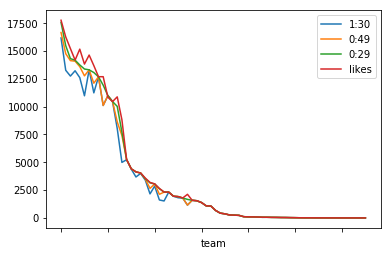

In [152]:
# tracker[lastVote].head(10).plot(kind='line')
# df.loc[df['column_name'] == some_value]
#df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

tracker.groupby('likes').head(10).set_index('team').plot()

In [142]:
tracker.sort_values('likes').head(10)

team                                          url  1:30  0:49  \
65      Paramnesia  https://www.youtube.com/watch?v=2xBDxqopZDY   0.0   0.0   
64  EosBusiness.io  https://www.youtube.com/watch?v=o0Sj03Krq44   0.0   0.0   
62   BUTTON Wallet  https://www.youtube.com/watch?v=AXijIqYwuoU   1.0   1.0   
61         CleanIt  https://www.youtube.com/watch?v=NnsyqVCWWWo   1.0   1.0   
60     UMKA Planet  https://www.youtube.com/watch?v=GPNkxGlr--Q   1.0   1.0   
63        MapChain  https://www.youtube.com/watch?v=Wc16hqBz8jY   1.0   1.0   
59  Digital Credit  https://www.youtube.com/watch?v=Zm5Q2-LKTP0   2.0   2.0   
58       BeScouted  https://www.youtube.com/watch?v=uxCUWwXXbTU   2.0   2.0   
57         EOSREAL  https://www.youtube.com/watch?v=E-VgWUjiOZc   3.0   3.0   
56           CoArt  https://www.youtube.com/watch?v=FXeO9ZomKps   4.0   4.0   

    0:29  likes  
65   0.0      0  
64   0.0      0  
62   1.0      1  
61   1.0      1  
60   1.0      1  
63   1.0      1  
59   2.0      2  
58   2.0      2  
57   3.0      3  
56   4.0      4

#### PLOT all teams

In [136]:
plt.figure(figsize=(16,6))
tracker.set_index('team')
plt.plot(tracker[lastVote],kind='hist')

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [135]:
# plt.hist(tracker[lastVote], 50, density=True, facecolor='g', alpha=0.75)